
<h1 style="text-align: center;">Trabajo Pr√°ctico N¬∫ 4</h1>

In [33]:
import cv2
import matplotlib.pyplot as plt
import os 
import numpy as np

## Ejercicio 1

¬øQu√© hace la Transformada de Hough y cu√°les son sus pasos?
La Transformada de Hough permite detectar l√≠neas rectas en una imagen, transformando el problema de detectar alineaciones de p√≠xeles en el espacio imagen a detectar acumulaciones en el espacio de par√°metros 
(
ùúå
,
ùúÉ
)
(œÅ,Œ∏).
Los pasos vistos en clases son:

1. Hallar los bordes de la imagen utilizando un m√©todo de detecci√≥n de bordes.
2. Umbralizar para obtener una imagen binaria.
3. Subdividir el plano 
(
ùúå
,
ùúÉ
)
(œÅ,Œ∏) discretizando en una cantidad espec√≠fica de puntos.

4. Para cada p√≠xel blanco de la imagen, decidir si cumple la ecuaci√≥n normal de la recta. En caso afirmativo, aumentar el acumulador.
5. Examinar el contenido de las celdas del acumulador con altas concentraciones (m√°ximo o umbral).
6. Graficar las rectas encontradas.

#### Detecci√≥n de bordes previa con Canny
Para que la Transformada de Hough funcione correctamente, es fundamental contar con una imagen que contenga solo los bordes relevantes. Para ello, utilizamos el detector de bordes de Canny, tal como lo hab√≠amos trabajado en el TP3.
Probamos distintos valores de umbrales y evaluamos los resultados visualmente.

libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile


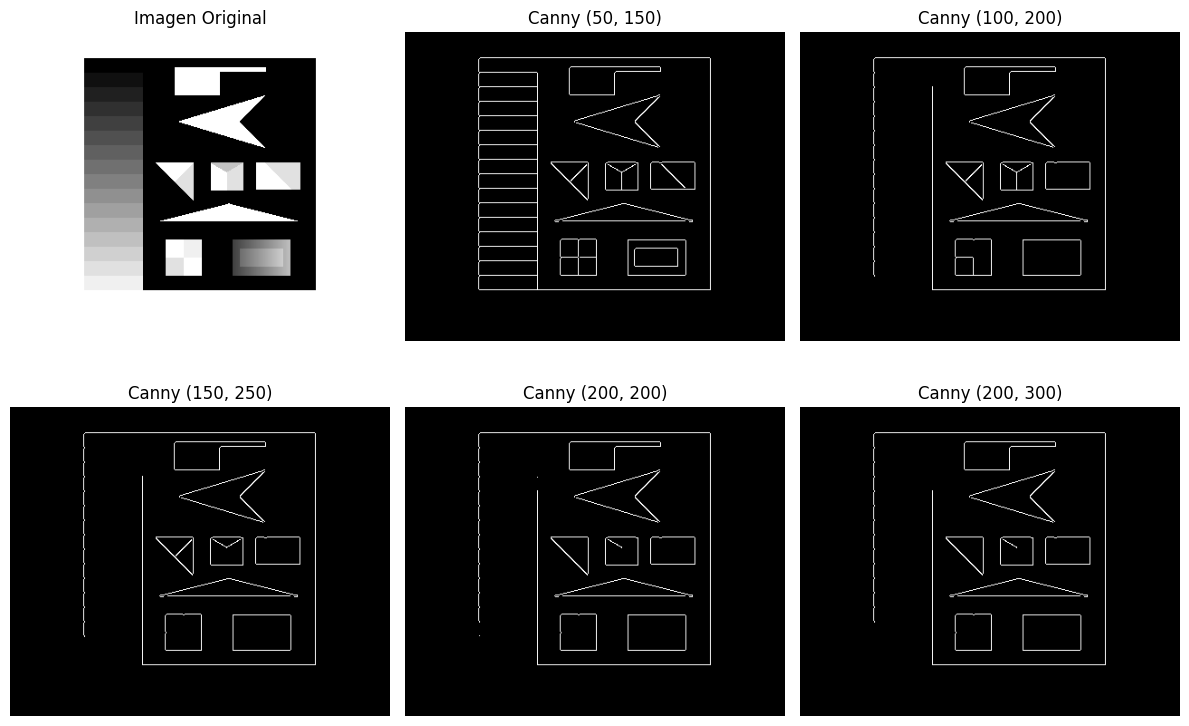

In [45]:
# Cargar imagen en escala de grises y como viene ya para tenerla cargada
imagen = cv2.imread('test.png', cv2.IMREAD_GRAYSCALE)
img = cv2.imread('test.png')  
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Verificamos que la imagen se haya cargado correctamente
if imagen is None:
    raise FileNotFoundError("No se encontr√≥ la imagen 'test.png'.")

# Umbrales de prueba para Canny
parametros_canny = [
    (50, 150),
    (100, 200),
    (150, 250),
    (200, 200),
    (200, 300),
]

# Crear figura para mostrar los resultados
plt.figure(figsize=(12, 8))

plt.subplot(2, 3, 1)
plt.title("Imagen Original")
plt.imshow(imagen, cmap='gray')
plt.axis('off')

# Aplicar y mostrar Canny con distintos umbrales
for i, (umbral_min, umbral_max) in enumerate(parametros_canny):
    bordes = cv2.Canny(imagen, umbral_min, umbral_max)
    plt.subplot(2, 3, i + 2)
    plt.title(f'Canny ({umbral_min}, {umbral_max})')
    plt.imshow(bordes, cmap='gray')
    plt.axis('off')

plt.tight_layout()
plt.show()


Tras comparar los resultados, observamos que el par de umbrales (50,150) fue el que permiti√≥ preservar m√°s bordes, incluyendo detalles finos.
Con ese resultado aplicamos la Transformada de Hough cl√°sica, que detecta l√≠neas infinitas representadas por sus par√°metros 
(
ùúå
,
ùúÉ
)
(œÅ,Œ∏). Las l√≠neas detectadas se graficaron sobre la imagen original.

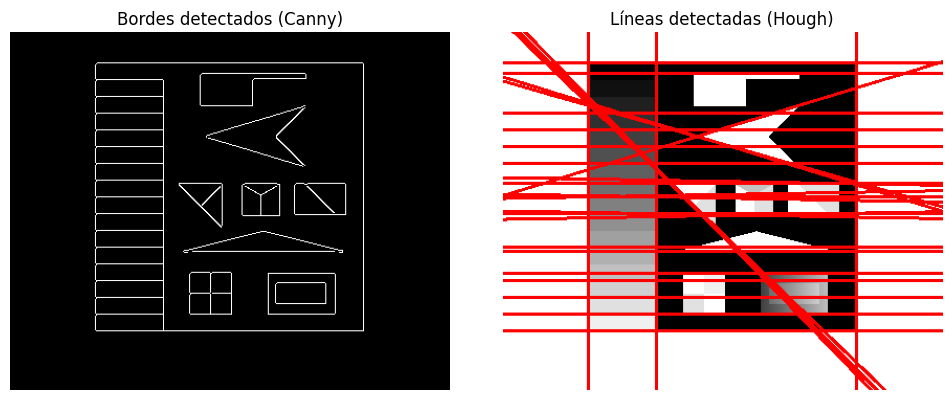

In [46]:
# 1. Detecci√≥n de bordes con Canny
edges = cv2.Canny(gray, threshold1=50, threshold2=150, apertureSize=3)

# Mostrar bordes detectados
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.imshow(edges, cmap='gray')
plt.title('Bordes detectados (Canny)')
plt.axis('off')

# 2. Aplicar Transformada de Hough
# rho = 1 pixel, theta = 1 grado (en radianes), threshold = m√≠nimo de votos
lines = cv2.HoughLines(edges, rho=1, theta=np.pi / 180, threshold=70)

# 3. Dibujar l√≠neas detectadas sobre la imagen original
img_lines = img.copy()

if lines is not None:
    for line in lines:
        rho, theta = line[0]
        a = np.cos(theta)
        b = np.sin(theta)
        x0 = a * rho
        y0 = b * rho
        # Calculamos dos puntos grandes para que la l√≠nea se extienda sobre la imagen
        x1 = int(x0 + 1000 * (-b))
        y1 = int(y0 + 1000 * (a))
        x2 = int(x0 - 1000 * (-b))
        y2 = int(y0 - 1000 * (a))
        cv2.line(img_lines, (x1, y1), (x2, y2), (0, 0, 255), 2)

# 4. Mostrar imagen con l√≠neas detectadas
plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(img_lines, cv2.COLOR_BGR2RGB))
plt.title('L√≠neas detectadas (Hough)')
plt.axis('off')

plt.tight_layout()
plt.show()


Al aplicar la Transformada de Hough cl√°sica sobre la imagen procesada con el detector de bordes de Canny (umbral 50‚Äì150), observamos que el par√°metro threshold de Hough cumple un rol clave en la sensibilidad del m√©todo.

Probamos distintos valores de threshold y comprobamos lo siguiente:

Con valores m√°s altos, como 100 o m√°s, se detectan √∫nicamente las l√≠neas m√°s prominentes, ignorando bordes finos o l√≠neas entrecortadas.

Con valores moderados o bajos (como 70 u 80), se logra un equilibrio entre sensibilidad y ruido, detectando muchas l√≠neas importantes sin sobrecargar el resultado.

Sin embargo, al bajar mucho el threshold, aparecen l√≠neas superpuestas, redundantes o inclinadas que no representan contornos reales de la imagen. Esto se puede observar en la figura, donde hay varias l√≠neas casi id√©nticas acumuladas, o l√≠neas diagonales que atraviesan toda la imagen sin corresponder a bordes reales.

Este comportamiento se debe a que la Hough cl√°sica considera l√≠neas infinitas, y peque√±as variaciones en los bordes (o ruido leve en el acumulador) pueden generar m√∫ltiples l√≠neas cercanas entre s√≠.

En conclusi√≥n, ajustar el par√°metro threshold es fundamental para balancear entre detecci√≥n y precisi√≥n, evitando tanto la omisi√≥n de l√≠neas importantes como la aparici√≥n de detecciones falsas o duplicadas.

Luego, aplicamos la versi√≥n probabil√≠stica cv2.HoughLinesP, que en lugar de representar l√≠neas infinitas, devuelve segmentos de l√≠nea concretos definidos por sus puntos extremos 
(
ùë•
1
,
ùë¶
1
)
(x 
1
‚Äã
 ,y 
1
‚Äã
 ) y 
(
ùë•
2
,
ùë¶
2
)
(x 
2
‚Äã
 ,y 
2
‚Äã
 ).
Esta versi√≥n permite trabajar con l√≠neas m√°s cortas o interrumpidas, y tiene par√°metros adicionales como:

minLineLength: longitud m√≠nima para considerar una l√≠nea.

maxLineGap: separaci√≥n m√°xima para unir dos puntos en una misma l√≠nea.

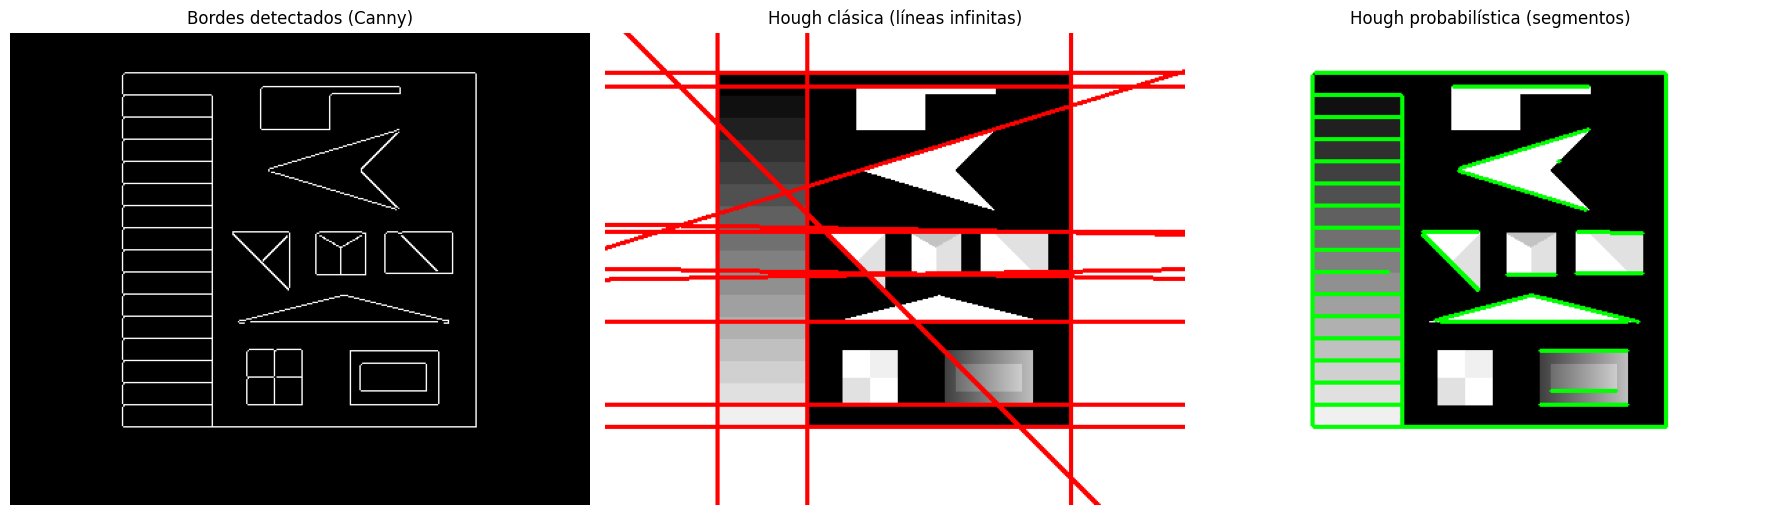

In [ ]:
# 1. Detecci√≥n de bordes con Canny
edges = cv2.Canny(gray, threshold1=50, threshold2=150, apertureSize=3)

# 2A. Transformada de Hough cl√°sica (l√≠neas infinitas)
lines = cv2.HoughLines(edges, rho=1, theta=np.pi/180, threshold=80)
img_hough = img.copy()
if lines is not None:
    for line in lines:
        rho, theta = line[0]
        a = np.cos(theta)
        b = np.sin(theta)
        x0 = a * rho
        y0 = b * rho
        x1 = int(x0 + 1000 * (-b))
        y1 = int(y0 + 1000 * (a))
        x2 = int(x0 - 1000 * (-b))
        y2 = int(y0 - 1000 * (a))
        cv2.line(img_hough, (x1, y1), (x2, y2), (0, 0, 255), 2)  # rojo

# 2B. Transformada de Hough probabil√≠stica (segmentos finitos)
lines_p = cv2.HoughLinesP(edges, rho=1, theta=np.pi/180, threshold=50,
                          minLineLength=1, maxLineGap=5)
img_hough_p = img.copy()
if lines_p is not None:
    for line in lines_p:
        x1, y1, x2, y2 = line[0]
        cv2.line(img_hough_p, (x1, y1), (x2, y2), (0, 255, 0), 2)  # verde

# 3. Mostrar resultados
plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
plt.title('Bordes detectados (Canny)')
plt.imshow(edges, cmap='gray')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.title('Hough cl√°sica (l√≠neas infinitas)')
plt.imshow(cv2.cvtColor(img_hough, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.subplot(1, 3, 3)
plt.title('Hough probabil√≠stica (segmentos)')
plt.imshow(cv2.cvtColor(img_hough_p, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.tight_layout()
plt.show()


Probamos diferentes combinaciones de par√°metros (umbral, longitud m√≠nima, separaci√≥n m√°xima) para ambas versiones de Hough con el objetivo de detectar la mayor cantidad de l√≠neas posibles.

Como conclusi√≥n, la versi√≥n probabil√≠stica result√≥ m√°s detallada y realista, permitiendo representar segmentos individuales de los objetos.
Sin embargo, notamos un problema recurrente en ambos m√©todos: ninguno fue capaz de detectar (sin poner threshold que contaminaran demasiado la imagen) correctamente los cuadrados peque√±os de la zona inferior izquierda de la imagen, ni la primera forma geometrica de margen superior. Tampoco se observa que hayan detectado el cuadrado del medio de la imagen
Este fallo puede deberse a que los lados de esos cuadrados son muy cortos, est√°n demasiado juntos, o la detecci√≥n de bordes previa no los separ√≥ bien, lo cual limita la acumulaci√≥n de votos o la uni√≥n en segmentos.

## Ejercicio 2

### SIFT
###
El m√©todo SIFT (Scale-Invariant Feature Transform) se utiliza para para detectar y describir puntos clave en una imagen que son invariantes a transformaciones como escala, rotaci√≥n e iluminaci√≥n.  SIFT localiza caracter√≠sticas distintivas en una imagen mediante la identificaci√≥n de puntos de inter√©s (keypoints) y el c√°lculo de descriptores, que representan la estructura local alrededor de cada punto clave. Estos descriptores se pueden comparar entre im√°genes para encontrar coincidencias, lo cual permite reconocer objetos o partes de una escena incluso bajo variaciones significativas.

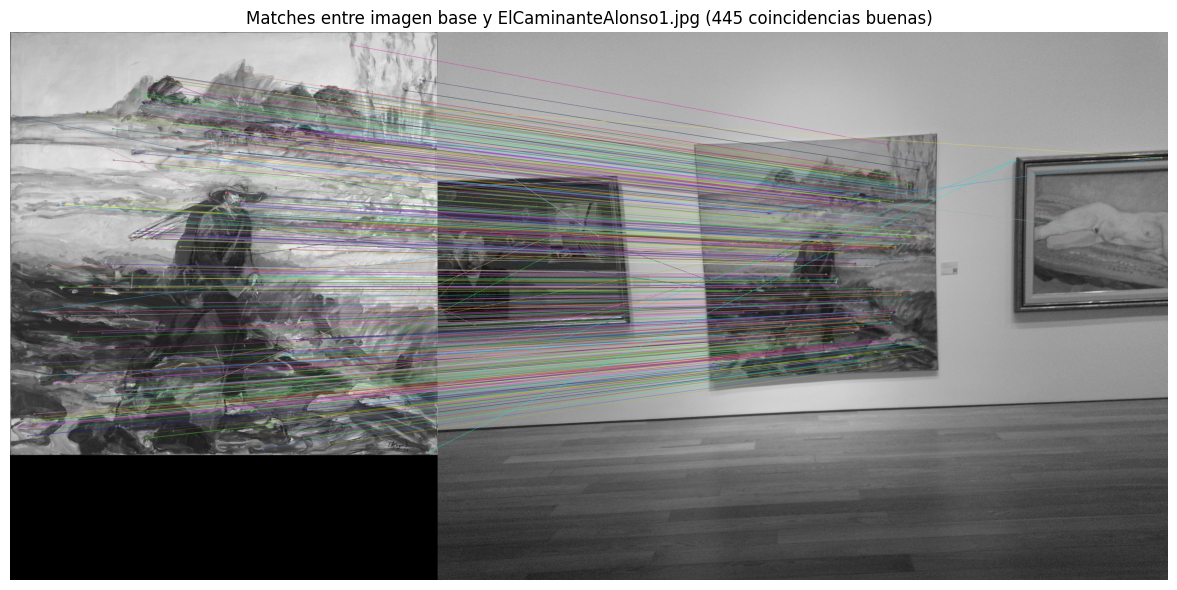

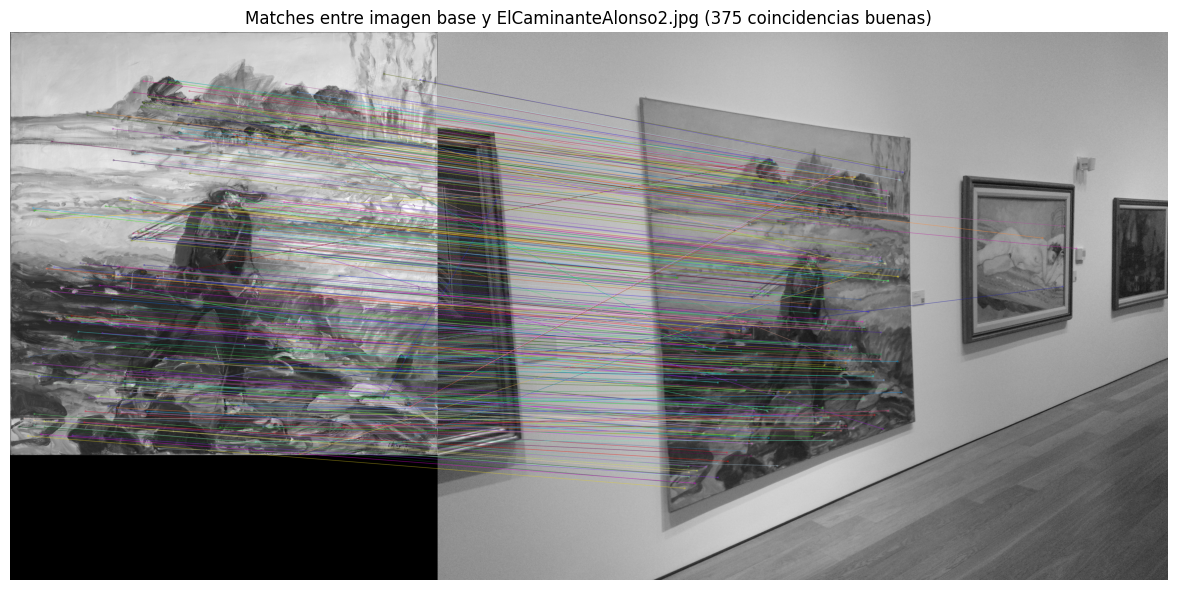

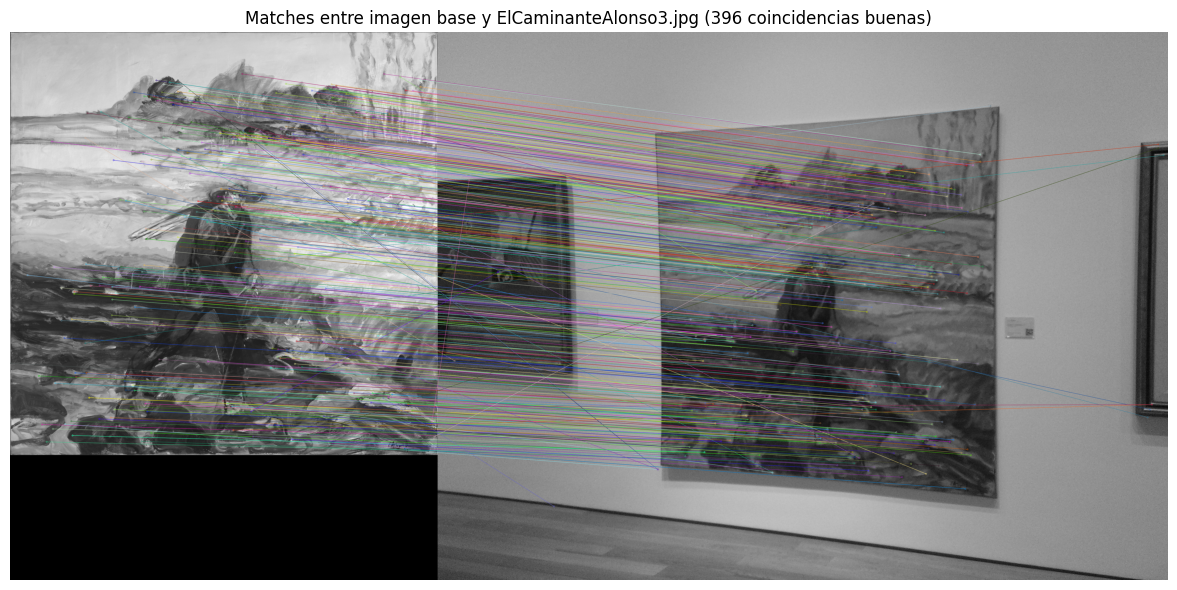

In [62]:

# Ruta base
ruta = 'imgEjer2'

# Imagen base (solo el cuadro)
img_base = cv2.imread(os.path.join(ruta, 'ElCaminanteAlonso.jpg'), cv2.IMREAD_GRAYSCALE)

# Lista de im√°genes a comparar
imagenes_comparar = [
    'ElCaminanteAlonso1.jpg',
    'ElCaminanteAlonso2.jpg',
    'ElCaminanteAlonso3.jpg'
]

# Crear detector SIFT
sift = cv2.SIFT_create()

# Detectar keypoints y descriptores en la imagen base
kp_base, des_base = sift.detectAndCompute(img_base, None)

# Matcher FLANN
index_params = dict(algorithm=1, trees=5)
search_params = dict(checks=50)
flann = cv2.FlannBasedMatcher(index_params, search_params)

for nombre in imagenes_comparar:
    img_comp = cv2.imread(os.path.join(ruta, nombre), cv2.IMREAD_GRAYSCALE)
    kp_comp, des_comp = sift.detectAndCompute(img_comp, None)

    # Matching con KNN
    matches = flann.knnMatch(des_base, des_comp, k=2)

    # Lowe's ratio test
    good_matches = []
    for m, n in matches:
        if m.distance < 0.7 * n.distance:
            good_matches.append(m)

    # Dibujar los buenos matches
    img_matches = cv2.drawMatches(img_base, kp_base, img_comp, kp_comp, good_matches, None,
                                  flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

    # Mostrar resultado
    plt.figure(figsize=(16, 6))
    plt.imshow(img_matches, cmap='gray')
    plt.title(f'Matches entre imagen base y {nombre} ({len(good_matches)} coincidencias buenas)')
    plt.axis('off')
    plt.tight_layout()
    plt.show()


### Conclusi√≥n

Tras comparar la imagen base del cuadro *El Caminante* con tres versiones tomadas en distintas ubicaciones de la galer√≠a (ElCaminanteAlonso1, 2 y 3), se observ√≥ lo siguiente:

- **ElCaminanteAlonso1** es la que present√≥ **mayor cantidad de coincidencias buenas**, alcanzando **445 matches**.
- Las otras versiones (2 y 3) tambi√©n mostraron un alto grado de similitud, pero con menor cantidad de coincidencias (375 y 396 respectivamente).

Esto indica que **la imagen 1 tiene una perspectiva m√°s similar a la imagen base**, o bien mejores condiciones para la detecci√≥n de caracter√≠sticas (iluminaci√≥n, √°ngulo, resoluci√≥n, etc.).


#### Ahora lo probamos con otro set de imagenes

In [ ]:
# Ruta a la carpeta donde est√°n las im√°genes
carpeta = 'imgEjer2'

# Nombres de las im√°genes
img1_path = os.path.join(carpeta, 'ElCaminanteAlonso.jpg')
img2_path = os.path.join(carpeta, 'ElCaminanteAlonso2.jpg')
img3_path = os.path.join(carpeta, 'ElCaminanteAlonso3.jpg')

# Cargar im√°genes en escala de grises
img1 = cv2.imread(img1_path, cv2.IMREAD_GRAYSCALE)
img2 = cv2.imread(img2_path, cv2.IMREAD_GRAYSCALE)
img3 = cv2.imread(img3_path, cv2.IMREAD_GRAYSCALE)

# Verificaci√≥n b√°sica
for i, img in enumerate([img1, img2, img3], start=1):
    if img is None:
        raise FileNotFoundError(f"No se pudo cargar la imagen {i}. Verific√° la ruta y el nombre del archivo.")

# Crear el detector SIFT
sift = cv2.SIFT_create()

# Funci√≥n para comparar dos im√°genes y mostrar los matches
def comparar_imagenes(im1, im2, nombre1, nombre2):
    # Detectar keypoints y descriptores
    kp1, des1 = sift.detectAndCompute(im1, None)
    kp2, des2 = sift.detectAndCompute(im2, None)

    # Matcher con FLANN + Lowe ratio test
    index_params = dict(algorithm=1, trees=5)
    search_params = dict(checks=50)
    flann = cv2.FlannBasedMatcher(index_params, search_params)
    matches = flann.knnMatch(des1, des2, k=2)

    # Filtrar matches buenos con ratio test
    good_matches = [m for m, n in matches if m.distance < 0.75 * n.distance]

    # Dibujar los matches
    matched_img = cv2.drawMatches(im1, kp1, im2, kp2, good_matches, None,
                                  flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

    # Mostrar resultados
    print(f"\nCoincidencias buenas entre {nombre1} y {nombre2}: {len(good_matches)}")
    plt.figure(figsize=(14, 6))
    plt.title(f"Matches entre {nombre1} y {nombre2} ({len(good_matches)} coincidencias buenas)")
    plt.imshow(matched_img)
    plt.axis('off')
    plt.show()

# Comparar entre los pares de im√°genes
comparar_imagenes(img1, img2, "Imagen 1", "Imagen 2")
comparar_imagenes(img1, img3, "Imagen 1", "Imagen 3")
comparar_imagenes(img2, img3, "Imagen 2", "Imagen 3")


## Ejercicio 3

**a) En el m√©todo Transformada de Hough, al final del algoritmo, ¬øqu√© significa que una celda \( A_{ij} \) tenga el n√∫mero 20?**

Significa que la celda ubicada en la posici√≥n \( (i, j) \) del acumulador de Hough recibi√≥ **20 votos**.  
Esto quiere decir que **20 p√≠xeles del borde de la imagen original** est√°n alineados seg√∫n los par√°metros \( \rho_i \) y \( \theta_j \), es decir, que **20 puntos distintos consideran que existe una l√≠nea** con esa inclinaci√≥n y distancia al origen.

Cuanto mayor sea ese valor, m√°s evidencia hay de que esa combinaci√≥n de par√°metros representa una **l√≠nea real** en la imagen.


**b) ¬øQu√© es el espacio escala Gaussiano?**

Es una representaci√≥n de una imagen en m√∫ltiples niveles de escala, obtenidos aplicando filtros Gaussianos con diferentes valores de sigma (œÉ).  
Se construye suavizando progresivamente la imagen para detectar estructuras a diferentes escalas, lo cual es esencial en algoritmos como SIFT para asegurar invariancia a la escala.

Cada nivel de esta representaci√≥n se obtiene mediante la convoluci√≥n de la imagen con un filtro Gaussiano, lo que se expresa como:

$$
L(x, y, \sigma) = G(x, y, \sigma) * I(x, y)
$$

donde:

- \( L(x, y, \sigma) \) es la imagen suavizada en una cierta escala œÉ,  
- \( G(x, y, \sigma) \) es el filtro Gaussiano con desviaci√≥n est√°ndar œÉ,  
- \( I(x, y) \) es la imagen original,  
- * representa la operaci√≥n de convoluci√≥n.


**c) ¬øQu√© es un extremo 3D en el m√©todo SIFT?**

En el algoritmo SIFT, un extremo 3D es un punto clave (keypoint) candidato que se detecta como un **m√°ximo o m√≠nimo local** dentro de un entorno tridimensional definido por:

- las coordenadas espaciales (x, y),  
- y la escala (œÉ), a lo largo del espacio de escalas Gaussiano.

Este an√°lisis se realiza sobre las im√°genes generadas por la **Diferencia de Gauss (DoG)**.  
Cada punto es comparado con sus **26 vecinos**: 8 en la misma imagen, 9 en la imagen anterior en escala, y 9 en la siguiente. Si el punto es mayor o menor que todos ellos, se considera un **extremo 3D**, y puede convertirse en un keypoint estable.

Este proceso permite detectar puntos invariantes no solo a rotaci√≥n y traslaci√≥n, sino tambi√©n a escala.


<hr>
<p style="text-align: center;">
Nombre: <strong>Sosa Suarez Santiago</strong><br>
Materia: <em>An√°lisis y Tratamiento de Im√°genes Satelitales</em><br>
Maestr√≠a en Ciencia de Datos ‚Äì <em>ITBA</em><br>
Fecha: 09 de Julio de 2025
</p>
<hr>